## Importing the libraries

In [1]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
tf.__version__

'2.18.0'

## Loading the images

In [2]:
path = "D:/COMPUTER VISION MASTERCLASS/repo/Datasets/cat_dog_2.zip"
zip_object = zipfile.ZipFile(file= path, mode= 'r')
zip_object.extractall('D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning')
zip_object.close()

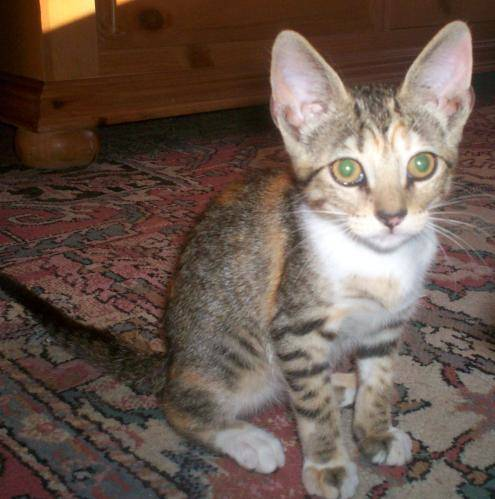

In [3]:
tf.keras.preprocessing.image.load_img('D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning/cat_dog_2/training_set/cat/cat.7.jpg')

## Training and Test Set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range =0.2)

training_dataset = training_generator.flow_from_directory('D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning/cat_dog_2/training_set',
                                                          target_size = (128,128),
                                                          batch_size =8,
                                                          class_mode = "categorical",
                                                          shuffle = True)

Found 4000 images belonging to 2 classes.


In [5]:
training_dataset.class_indices

{'cat': 0, 'dog': 1}

In [6]:
training_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
testing_generator = ImageDataGenerator(rescale = 1./255)
testing_dataset = testing_generator.flow_from_directory('D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning/cat_dog_2/test_set',
                                                        target_size = (128, 128),
                                                        batch_size = 1,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 1000 images belonging to 2 classes.


In [8]:
testing_dataset.class_indices

{'cat': 0, 'dog': 1}

In [9]:
testing_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Pretrained network

In [10]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (128, 128, 3)))

In [11]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:
len(base_model.layers)

175

In [13]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<InputLayer name=input_layer, built=True> True
<ZeroPadding2D name=conv1_pad, built=True> True
<Conv2D name=conv1_conv, built=True> True
<BatchNormalization name=conv1_bn, built=True> True
<Activation name=conv1_relu, built=True> True
<ZeroPadding2D name=pool1_pad, built=True> True
<MaxPooling2D name=pool1_pool, built=True> True
<Conv2D name=conv2_block1_1_conv, built=True> True
<BatchNormalization name=conv2_block1_1_bn, built=True> True
<Activation name=conv2_block1_1_relu, built=True> True
<Conv2D name=conv2_block1_2_conv, built=True> True
<BatchNormalization name=conv2_block1_2_bn, built=True> True
<Activation name=conv2_block1_2_relu, built=True> True
<Conv2D name=conv2_block1_0_conv, built=True> True
<Conv2D name=conv2_block1_3_conv, built=True> True
<BatchNormalization name=conv2_block1_0_bn, built=True> True
<BatchNormalization name=conv2_block1_3_bn, built=True> True
<Add name=conv2_block1_add, built=True> True
<Activation name=conv2_block1_out, built=True> True
<Conv2D name=c

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<InputLayer name=input_layer, built=True> False
<ZeroPadding2D name=conv1_pad, built=True> False
<Conv2D name=conv1_conv, built=True> False
<BatchNormalization name=conv1_bn, built=True> False
<Activation name=conv1_relu, built=True> False
<ZeroPadding2D name=pool1_pad, built=True> False
<MaxPooling2D name=pool1_pool, built=True> False
<Conv2D name=conv2_block1_1_conv, built=True> False
<BatchNormalization name=conv2_block1_1_bn, built=True> False
<Activation name=conv2_block1_1_relu, built=True> False
<Conv2D name=conv2_block1_2_conv, built=True> False
<BatchNormalization name=conv2_block1_2_bn, built=True> False
<Activation name=conv2_block1_2_relu, built=True> False
<Conv2D name=conv2_block1_0_conv, built=True> False
<Conv2D name=conv2_block1_3_conv, built=True> False
<BatchNormalization name=conv2_block1_0_bn, built=True> False
<BatchNormalization name=conv2_block1_3_bn, built=True> False
<Add name=conv2_block1_add, built=True> False
<Activation name=conv2_block1_out, built=True> F

## Custom Dense Layer

In [16]:
base_model.output

<KerasTensor shape=(None, 4, 4, 2048), dtype=float32, sparse=False, name=keras_tensor_174>

In [17]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 1025, activation='relu')(head_model)
head_model = Dropout(rate=0.2)(head_model)
head_model = Dense(units = 1025, activation='relu')(head_model)
head_model = Dropout(rate=0.2)(head_model)
head_model = Dense(units=2, activation='softmax')(head_model)

## Building and training the Neural Network

In [18]:
base_model.input

[<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=False, name=keras_tensor>]

In [19]:
network = Model(inputs = base_model.input, outputs = head_model)

In [20]:
8 * 8 * 2048

131072

In [21]:
(2048+2)/2 # (pooling layers + number of categories)/2

1025.0

In [22]:
network.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 26,741,639 (102.01 MB)

 Trainable params: 3,153,927 (12.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
network.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = network.fit(training_dataset, epochs =10)

Epoch 1/10


C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 138ms/step - accuracy: 0.5260 - loss: 0.7493
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 135ms/step - accuracy: 0.5491 - loss: 0.6880
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 153ms/step - accuracy: 0.5885 - loss: 0.6733
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - accuracy: 0.5923 - loss: 0.6692
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.5972 - loss: 0.6628
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 145ms/step - accuracy: 0.6010 - loss: 0.6603
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - accuracy: 0.6095 - loss: 0.6569
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - accuracy: 0.6355 - loss: 0.6435
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - accuracy: 0.6353 - loss: 0.6368
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - accuracy: 0.6110 - loss: 0.6496


In [25]:
testing_dataset.class_indices

{'cat': 0, 'dog': 1}

In [26]:
predictions = network.predict(testing_dataset)
predictions

C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step


array([[0.61554223, 0.38445786],
       [0.5412834 , 0.4587166 ],
       [0.59959483, 0.40040517],
       ...,
       [0.62421227, 0.37578773],
       [0.00170737, 0.9982926 ],
       [0.14309698, 0.8569031 ]], dtype=float32)

In [27]:
predictions = np.argmax(predictions, axis =1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [28]:
testing_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_dataset.classes, predictions)

0.653

<Axes: >

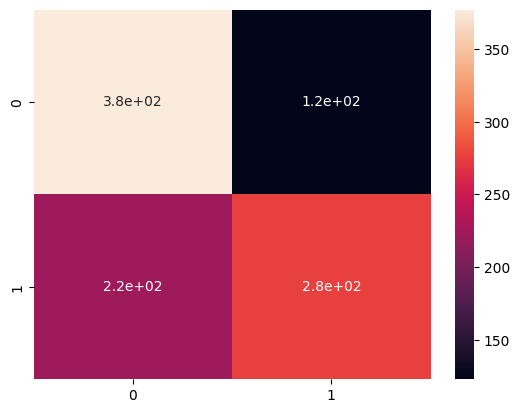

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_dataset.classes, predictions)
sns.heatmap(cm, annot = True)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(testing_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       500
           1       0.69      0.55      0.61       500

    accuracy                           0.65      1000
   macro avg       0.66      0.65      0.65      1000
weighted avg       0.66      0.65      0.65      1000



## Fine tuning

In [32]:
base_model.trainable = True

In [33]:
for layers in base_model.layers:
    print(layers, layers.trainable)

<InputLayer name=input_layer, built=True> False
<ZeroPadding2D name=conv1_pad, built=True> False
<Conv2D name=conv1_conv, built=True> False
<BatchNormalization name=conv1_bn, built=True> False
<Activation name=conv1_relu, built=True> False
<ZeroPadding2D name=pool1_pad, built=True> False
<MaxPooling2D name=pool1_pool, built=True> False
<Conv2D name=conv2_block1_1_conv, built=True> False
<BatchNormalization name=conv2_block1_1_bn, built=True> False
<Activation name=conv2_block1_1_relu, built=True> False
<Conv2D name=conv2_block1_2_conv, built=True> False
<BatchNormalization name=conv2_block1_2_bn, built=True> False
<Activation name=conv2_block1_2_relu, built=True> False
<Conv2D name=conv2_block1_0_conv, built=True> False
<Conv2D name=conv2_block1_3_conv, built=True> False
<BatchNormalization name=conv2_block1_0_bn, built=True> False
<BatchNormalization name=conv2_block1_3_bn, built=True> False
<Add name=conv2_block1_add, built=True> False
<Activation name=conv2_block1_out, built=True> F

In [34]:
len(base_model.layers)

175

In [35]:
fine_tuning_at = 140

In [36]:
for layers in base_model.layers[:fine_tuning_at]:
    layers.trainable = False

In [37]:
network.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = network.fit(training_dataset, epochs=10)

Epoch 1/10


C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


500/500 ━━━━━━━━━━━━━━━━━━━━ 76s 144ms/step - accuracy: 0.6451 - loss: 0.6258
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 65s 131ms/step - accuracy: 0.6346 - loss: 0.6305
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.6297 - loss: 0.6321
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.6371 - loss: 0.6365
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.6180 - loss: 0.6414
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.6469 - loss: 0.6317
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.6388 - loss: 0.6380
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.6533 - loss: 0.6228
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.6320 - loss: 0.6375
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.6486 - loss: 0.6285


## Evaluating

In [39]:
predictions = network.predict(testing_dataset)
predictions

C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step


array([[5.6894475e-01, 4.3105528e-01],
       [3.7406126e-01, 6.2593871e-01],
       [5.1425380e-01, 4.8574620e-01],
       ...,
       [5.7401496e-01, 4.2598501e-01],
       [2.5862668e-05, 9.9997413e-01],
       [1.0259485e-01, 8.9740521e-01]], dtype=float32)

In [40]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

<Axes: >

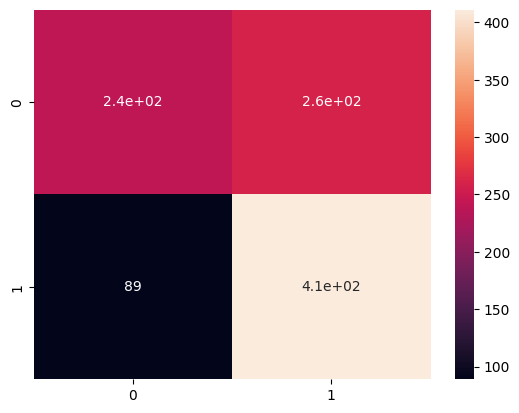

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_dataset.classes, predictions )
sns.heatmap(cm, annot= True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(testing_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58       500
           1       0.61      0.82      0.70       500

    accuracy                           0.65      1000
   macro avg       0.67      0.65      0.64      1000
weighted avg       0.67      0.65      0.64      1000



## Saving the model

In [59]:
model_json = network.to_json()
with open('network.json', 'w') as json_file:
    json_file.write(model_json)

In [60]:
from keras.models import save_model
network_saved = save_model(network, 'D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning/weights.hdf5')

In [61]:
with open('network.json' , 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras.src.models.functional", "class_name": "Functional", "config": {"name": "functional", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null, "name": "input_layer", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": false, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "padding": [[3, 3], [3, 3]], "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 128, 128, 3]}, "name": "conv1_pad", "inbound_nodes": [{"args": [{"class_name": "__keras_tensor__", "config": {"shape": [null, 128, 128, 3], "dtype": "float32", "keras_history": ["input_layer", 0, 0]}}], "kwargs": {}}]}, {"module": "keras.layers", "class_name": "Conv2D", "config": {

In [62]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
network_loaded.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 26,741,639 (102.01 MB)

 Trainable params: 3,153,927 (12.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Classifying single image

In [83]:
image = cv2.imread('D:/COMPUTER VISION MASTERCLASS/Transfer learning and Fine tuning/cat_dog_2/test_set/cat/cat.3513.jpg')

In [84]:
cv2.imshow('window',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [85]:
image = cv2.resize(image, (128,128))

In [86]:
cv2.imshow('window',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
image

array([[[ 42,  51,  55],
        [ 42,  51,  55],
        [ 45,  54,  58],
        ...,
        [ 95, 105, 104],
        [ 93, 104, 102],
        [ 95, 106, 104]],

       [[ 38,  48,  51],
        [ 38,  48,  51],
        [ 40,  49,  53],
        ...,
        [ 95, 106, 104],
        [ 93, 104, 102],
        [ 93, 104, 102]],

       [[ 38,  47,  51],
        [ 38,  47,  51],
        [ 39,  48,  52],
        ...,
        [ 92, 102, 100],
        [ 92, 103, 101],
        [ 89, 100,  98]],

       ...,

       [[172, 144, 109],
        [183, 153, 117],
        [189, 155, 117],
        ...,
        [223, 221, 221],
        [221, 219, 219],
        [219, 217, 217]],

       [[163, 142, 106],
        [172, 147, 110],
        [193, 162, 123],
        ...,
        [220, 218, 218],
        [216, 214, 214],
        [218, 216, 216]],

       [[203, 203, 195],
        [164, 145, 109],
        [189, 152, 118],
        ...,
        [208, 208, 208],
        [206, 206, 206],
        [211, 211, 211]]

In [88]:
image = image/255
image

array([[[0.16470588, 0.2       , 0.21568627],
        [0.16470588, 0.2       , 0.21568627],
        [0.17647059, 0.21176471, 0.22745098],
        ...,
        [0.37254902, 0.41176471, 0.40784314],
        [0.36470588, 0.40784314, 0.4       ],
        [0.37254902, 0.41568627, 0.40784314]],

       [[0.14901961, 0.18823529, 0.2       ],
        [0.14901961, 0.18823529, 0.2       ],
        [0.15686275, 0.19215686, 0.20784314],
        ...,
        [0.37254902, 0.41568627, 0.40784314],
        [0.36470588, 0.40784314, 0.4       ],
        [0.36470588, 0.40784314, 0.4       ]],

       [[0.14901961, 0.18431373, 0.2       ],
        [0.14901961, 0.18431373, 0.2       ],
        [0.15294118, 0.18823529, 0.20392157],
        ...,
        [0.36078431, 0.4       , 0.39215686],
        [0.36078431, 0.40392157, 0.39607843],
        [0.34901961, 0.39215686, 0.38431373]],

       ...,

       [[0.6745098 , 0.56470588, 0.42745098],
        [0.71764706, 0.6       , 0.45882353],
        [0.74117647, 0

In [89]:
image.shape

(128, 128, 3)

In [90]:
image =image.reshape(-1, 128, 128, 3)
image

array([[[[0.16470588, 0.2       , 0.21568627],
         [0.16470588, 0.2       , 0.21568627],
         [0.17647059, 0.21176471, 0.22745098],
         ...,
         [0.37254902, 0.41176471, 0.40784314],
         [0.36470588, 0.40784314, 0.4       ],
         [0.37254902, 0.41568627, 0.40784314]],

        [[0.14901961, 0.18823529, 0.2       ],
         [0.14901961, 0.18823529, 0.2       ],
         [0.15686275, 0.19215686, 0.20784314],
         ...,
         [0.37254902, 0.41568627, 0.40784314],
         [0.36470588, 0.40784314, 0.4       ],
         [0.36470588, 0.40784314, 0.4       ]],

        [[0.14901961, 0.18431373, 0.2       ],
         [0.14901961, 0.18431373, 0.2       ],
         [0.15294118, 0.18823529, 0.20392157],
         ...,
         [0.36078431, 0.4       , 0.39215686],
         [0.36078431, 0.40392157, 0.39607843],
         [0.34901961, 0.39215686, 0.38431373]],

        ...,

        [[0.6745098 , 0.56470588, 0.42745098],
         [0.71764706, 0.6       , 0.45882353]

In [91]:
image.shape

(1, 128, 128, 3)

In [92]:
result = network_loaded.predict(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.7786419 , 0.22135808]], dtype=float32)

In [93]:
predictions = np.argmax(result)
predictions

0

In [94]:
testing_dataset.class_indices

{'cat': 0, 'dog': 1}

In [95]:
if predictions==0:
    print("Cat")
else:
    print("Dog")

Cat
